# Fit the DDM on hierarchical data

In [11]:
from rlssm.model.models_DDM import DDModel
from rlssm.utility.load_data import load_example_dataset

## Import the data

In [12]:
data = load_example_dataset(hierarchical_levels = 2)

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,1,1,1,43,39,2,1,1,1.244082,0
1,1,1,2,60,50,4,3,1,1.101821,1
2,1,1,3,44,36,4,2,2,1.029923,0
3,1,1,4,55,55,4,3,2,1.368007,0
4,1,1,5,52,49,4,3,3,1.039329,1


## Initialize the model

In [13]:
model = DDModel(hierarchical_levels = 2)

## Fit

In [14]:
# sampling parameters
n_warmup = 1000
n_sampling = 3000
n_chains = 2
n_thin = 1

# bayesian model, change default priors:
drift_priors = {'mu_mu':1, 'sd_mu':1, 'mu_sd':0, 'sd_sd':1}
threshold_priors = {'mu_mu':-1, 'sd_mu':.5, 'mu_sd':0, 'sd_sd':1}

In [15]:
model_fit = model.fit(
    data,
    drift_priors=drift_priors,
    threshold_priors=threshold_priors,
    iter_warmup=n_warmup,
    iter_sampling=n_sampling,
    chains = n_chains)

15:31:57 - cmdstanpy - INFO - CmdStan start processing


Fitting the model using the priors:
drift_priors {'mu_mu': 1, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 1}
threshold_priors {'mu_mu': -1, 'sd_mu': 0.5, 'mu_sd': 0, 'sd_sd': 1}
ndt_priors {'mu_mu': 1, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 1}


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

16:54:51 - cmdstanpy - INFO - CmdStan done processing.
16:54:51 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: wiener_lpdf: Random variable  = 0.808621, but must be greater than nondecision time = 0.856873 (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/hierDDM.stan', line 71, column 1 to column 59)
	Exception: wiener_lpdf: Random variable  = 0.88008, but must be greater than nondecision time = 8.0003 (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/hierDDM.stan', line 71, column 1 to column 59)
	Exception: wiener_lpdf: Random variable  = 0.693101, but must be greater than nondecision time = 0.731038 (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/hierDDM.stan', line 71, column 1 to column 59)
	Exception: wiener_lpdf: Random variable  = 1.24408, but must be greater than nondecision time = 1.61877 (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/hierDDM.stan', line 71, column 1 to column 59)
	Exception: wiener_lp


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0 of 6000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
0.0 of 6000 iterations ended with a divergence (0.0%)


### get Rhat

In [16]:
model_fit.rhat.describe()

,rhat
count,32492.000000
mean,0.999893
std,0.000204
min,0.999668
25%,0.999767
50%,0.999838
75%,0.999985
max,1.005270


### calculate wAIC

In [17]:
model_fit.waic

{'lppd': -5411.228614502201,
 'p_waic': 101.58104229127723,
 'waic': 11025.619313586956,
 'waic_se': 176.69049322043986}

## Posteriors

In [18]:
model_fit.samples.describe()

,transf_mu_drift,transf_mu_threshold,transf_mu_ndt,drift_sbj[1],drift_sbj[2],drift_sbj[3],drift_sbj[4],drift_sbj[5],drift_sbj[6],drift_sbj[7],...,ndt_sbj[18],ndt_sbj[19],ndt_sbj[20],ndt_sbj[21],ndt_sbj[22],ndt_sbj[23],ndt_sbj[24],ndt_sbj[25],ndt_sbj[26],ndt_sbj[27]
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.898301,1.808481,0.744722,1.131731,0.798737,0.986908,0.722948,0.788983,1.105284,1.263018,...,0.730242,0.387371,0.917456,0.746392,0.742313,0.583006,0.738916,0.853453,0.465373,0.863570
std,0.058116,0.055918,0.028522,0.093173,0.086066,0.092792,0.070658,0.081478,0.093083,0.090678,...,0.011009,0.013659,0.012028,0.016740,0.013097,0.015155,0.011572,0.009432,0.005680,0.013910
min,0.659297,1.544630,0.639045,0.792047,0.456046,0.643955,0.455543,0.489435,0.688386,0.905219,...,0.678231,0.315832,0.859210,0.672831,0.657461,0.514207,0.690349,0.810220,0.433967,0.784163
25%,0.860250,1.772822,0.725159,1.068705,0.739669,0.923656,0.676777,0.733694,1.043055,1.202902,...,0.723546,0.378870,0.910208,0.735630,0.734048,0.573354,0.731568,0.847478,0.461864,0.854909
50%,0.898457,1.809175,0.744947,1.132860,0.798081,0.985378,0.724199,0.789384,1.105080,1.262295,...,0.731054,0.388382,0.918521,0.747302,0.743221,0.583948,0.739550,0.854087,0.465859,0.864776
75%,0.936208,1.846293,0.764099,1.195310,0.859022,1.048747,0.769750,0.843619,1.168743,1.322272,...,0.737949,0.397143,0.925954,0.758217,0.751423,0.593777,0.747070,0.860118,0.469413,0.873504
max,1.136100,2.019190,0.841500,1.473330,1.111170,1.332630,1.023240,1.100870,1.461650,1.606720,...,0.761786,0.423363,0.950872,0.799182,0.779000,0.625674,0.771493,0.880856,0.480313,0.905383


In [19]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

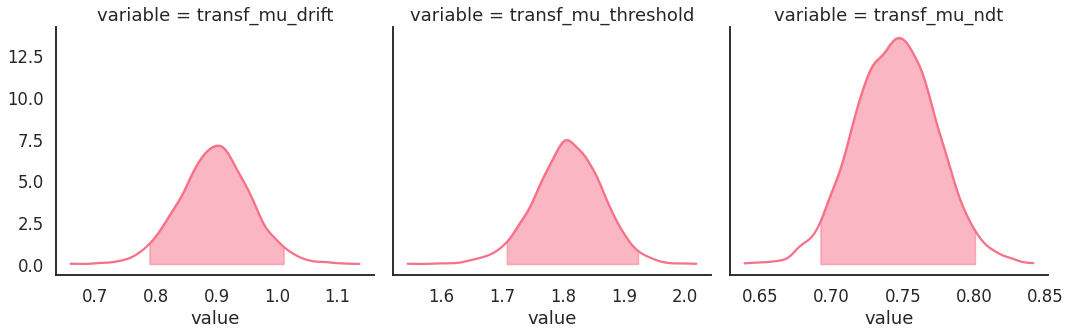

In [20]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

## Posterior predictives

### Ungrouped

In [21]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_low,quant_30_rt_low,quant_50_rt_low,quant_70_rt_low,quant_90_rt_low,quant_10_rt_up,quant_30_rt_up,quant_50_rt_up,quant_70_rt_up,quant_90_rt_up
sample,,,,,,,,,,,,,
1,0.828125,1.470404,2.049204,0.885286,1.095286,1.292219,1.600708,2.238407,0.948956,1.119072,1.309028,1.590231,2.229997
2,0.839882,1.476158,1.991883,0.908837,1.100904,1.272786,1.587307,2.266938,0.938415,1.120370,1.307830,1.588503,2.258303
3,0.828280,1.478515,2.079021,0.908075,1.087714,1.286657,1.577390,2.273524,0.939933,1.118648,1.303609,1.596304,2.266508
4,0.829208,1.473455,1.906895,0.917819,1.084980,1.289052,1.570813,2.285771,0.937307,1.115465,1.308620,1.601008,2.257532
5,0.833075,1.477880,2.241918,0.897849,1.094527,1.287455,1.573776,2.216378,0.944545,1.122468,1.312191,1.590413,2.220474
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.841275,1.465018,1.934810,0.876146,1.074451,1.269918,1.579910,2.212086,0.938247,1.114337,1.301252,1.585817,2.239506
97,0.836479,1.488256,2.091617,0.907117,1.089067,1.306196,1.604752,2.267040,0.951071,1.133317,1.329467,1.598719,2.236498
98,0.829363,1.468810,2.171202,0.884969,1.079217,1.253756,1.533269,2.123618,0.939462,1.129569,1.315620,1.599462,2.229984


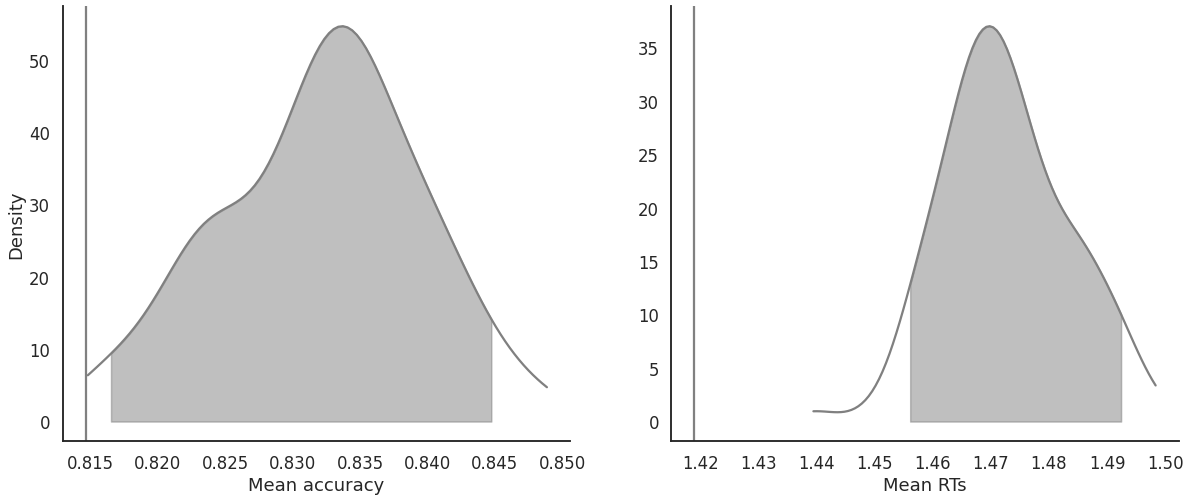

In [22]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

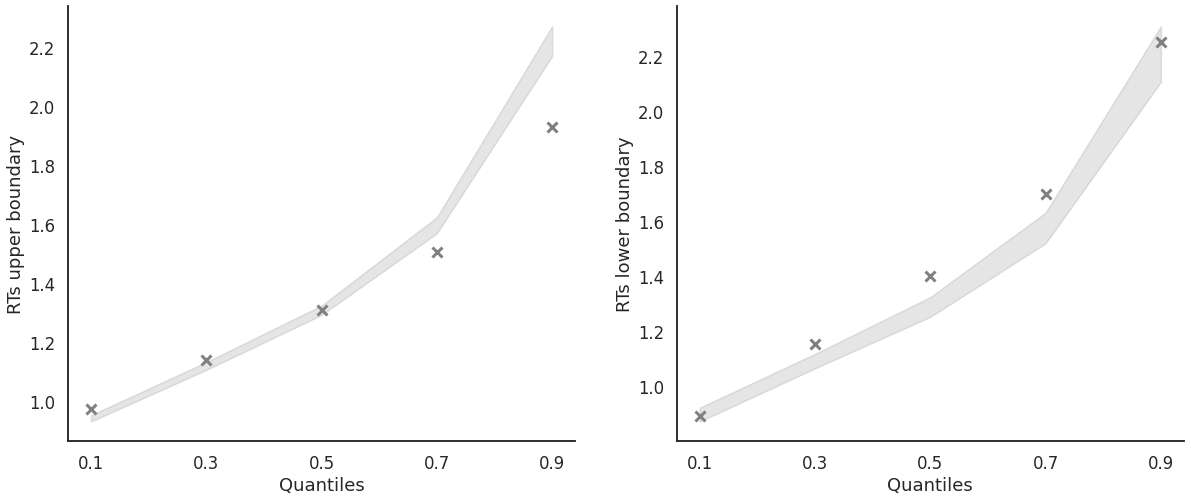

In [23]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

### Grouped

In [24]:
import numpy as np
import pandas as pd

In [25]:
# Define new grouping variables, in this case, for the different choice pairs, but any grouping var can do
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [26]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1           AB          1            0.828678  1.441631  1.909241   
                        2            0.830540  1.481447  1.970662   
                        3            0.858473  1.487665  2.021666   
                        4            0.852886  1.496097  2.167160   
                        5            0.789572  1.456304  2.198047   
...                                       ...       ...       ...   
3           CD          96           0.833333  1.466782  2.002895   
                        97           0.844444  1.468310  2.251764   
                        98           0.816667  1.505626  1.640860   
                        99           0.842593  1.450380  2.108612   
                        100          0.833333  1.484410  1.438772   

                                quant_30_rt_low  quant_30_rt_up  \
block_label choice_pair sample                                    
1           AB          1              1.098282        1.103660   
                        2              1.107786        1.122101   
                        3              1.081304        1.122758   
                        4              1.081151        1.101061   
                        5              1.117267        1.104133   
...                                         ...             ...   
3           CD          96             1.087802        1.110831   
                        97             1.069949        1.124637   
                        98             1.137104        1.157832   
                        99             0.999414        1.115741   
                        100            1.137716        1.113024   

                                quant_50_rt_low  quant_50_rt_up  \
block_label choice_pair sample                                    
1           AB          1              1.248868        1.327238   
                        2              1.350835        1.290612   
                        3              1.234175        1.352676   
                        4              1.358445        1.293834   
                        5              1.342203        1.279933   
...                                         ...             ...   
3           CD          96             1.357251        1.269586   
                        97             1.268553        1.285476   
                        98             1.310062        1.378782   
                        99             1.157007        1.290892   
                        100            1.305692        1.357904   

                                quant_70_rt_low  quant_70_rt_up  
block_label choice_pair sample                                   
1           AB          1              1.545490        1.581777  
                        2              1.544268        1.589600  
                        3              1.482428        1.601758  
                        4              1.789253        1.612836  
                        5              1.540382        1.532344  
...                                         ...             ...  
3           CD          96             1.624722        1.526907  
                        97             1.503986        1.544614  
                        98             1.635621        1.661984  
                        99             1.409184        1.585189  
                        100            1.614194        1.624920  

[1200 rows x 9 columns]

In [27]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_low  \
block_bins sample                                                       
1          1            0.812346  1.459087  1.951942         1.137344   
           2            0.816049  1.477051  1.891089         1.066953   
           3            0.849383  1.473473  1.724397         1.102987   
           4            0.838272  1.492136  1.951988         1.098538   
           5            0.830864  1.463013  2.663763         1.100371   
...                          ...       ...       ...              ...   
8          96           0.835013  1.468610  2.268501         1.064925   
           97           0.838791  1.485704  1.785313         1.148975   
           98           0.838791  1.462897  1.920004         1.124379   
           99           0.842569  1.489514  3.126827         1.106704   
           100          0.817380  1.503107  2.290161         1.103743   

                   quant_30_rt_up  quant_50_rt_low  quant_50_rt_up  \
block_bins sample                                                    
1          1             1.119813         1.296755        1.311837   
           2             1.135786         1.283172        1.325183   
           3             1.120893         1.332402        1.302252   
           4             1.130893         1.282762        1.320762   
           5             1.108198         1.280492        1.313134   
...                           ...              ...             ...   
8          96            1.123394         1.220069        1.299717   
           97            1.133100         1.372949        1.335600   
           98            1.095533         1.306262        1.272728   
           99            1.092855         1.303919        1.261855   
           100           1.145024         1.297612        1.337503   

                   quant_70_rt_low  quant_70_rt_up  
block_bins sample                                   
1          1              1.562144        1.583038  
           2              1.567871        1.577595  
           3              1.566976        1.588018  
           4              1.540370        1.625853  
           5              1.549582        1.597297  
...                            ...             ...  
8          96             1.495582        1.613901  
           97             1.768847        1.603411  
           98             1.543548        1.572974  
           99             1.680072        1.538527  
           100            1.715041        1.659607  

[800 rows x 9 columns]

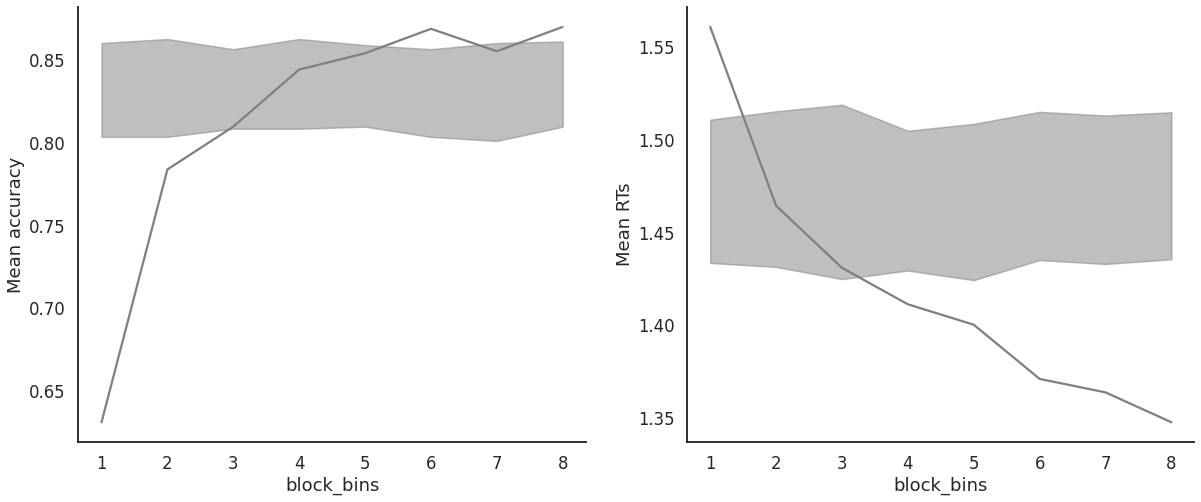

In [28]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

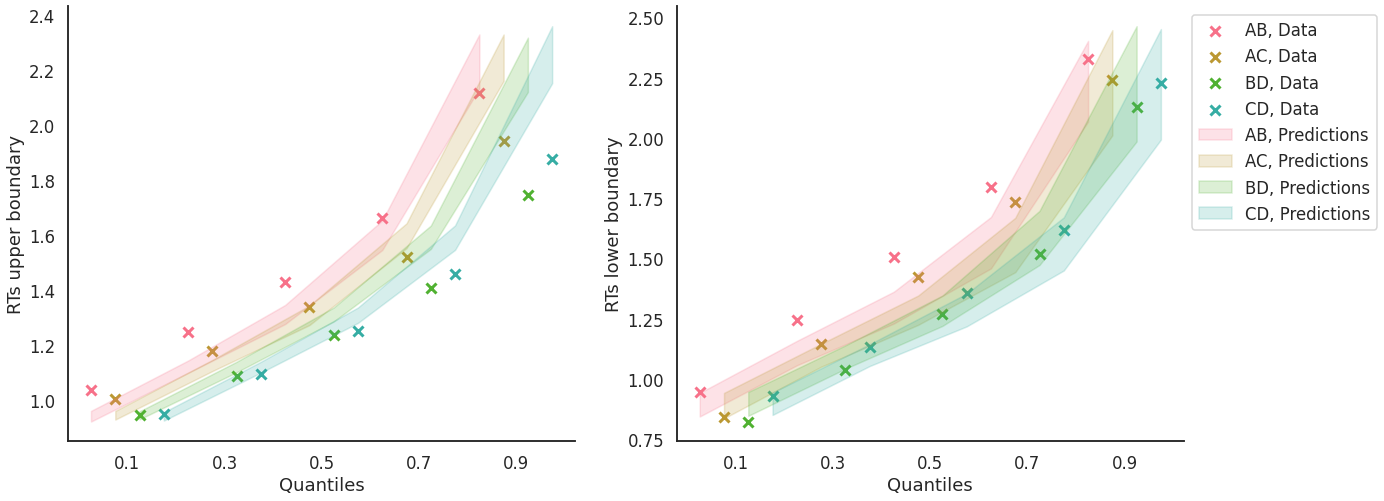

In [29]:
model_fit.plot_quantiles_grouped_posterior_predictives(n_posterior_predictives=100,
                                                        grouping_var='choice_pair',
                                                        kind='shades',
                                                        quantiles=[.1, .3, .5, .7, .9]);